In [ ]:
!pip install shap tensorflow scikit-learn

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [ ]:
#california housing dataset import
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
X, y = data.data, data.target
feature_names = data.feature_names

In [ ]:
print("TensorFlow GPU 사용 가능 여부:", tf.config.list_physical_devices('GPU'))

TensorFlow GPU 사용 가능 여부: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# SHAP 해석 (Kernel SHAP)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)

#모델의 예측값과 SHAP의 예측값이 다를 경우 오류 발생

100%|===================| 4122/4128 [05:08<00:00]       

In [ ]:
import matplotlib as mpl #그래프 옵션(글꼴)
import matplotlib.pyplot as plt #그래프 옵션(그래프 축, 범례, 제목, 그래프 사이즈)
import seaborn as sns #시각화
mpl.rc('font',family='AppleGothic')
#주로 데이터 분석을 하면 이것부터 깔고 시작함

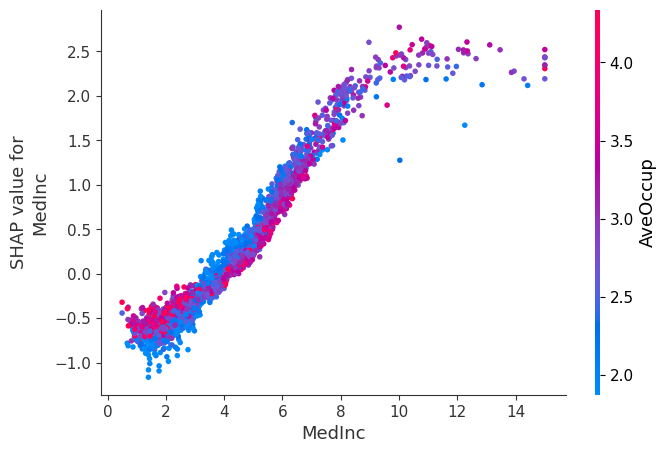

In [ ]:
#특정 대상에 대한 SHAP 종속성 시각화
shap.dependence_plot(0, shap_values.values, X_test, feature_names=feature_names)